# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import pandas as pd # has to add this because fetch_openml doesn't work without pandas
# theres a way to do this without by mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# but I didn't know if that was the right thing to do. Hope that doesn't change anything my bad
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [18]:
def apply_svd_custom(X_train, X_test, n_components):
    # Center the data by subtracting the mean
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean

    # Compute the covariance matrix (transpose of centered data * centered data)
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / X_train_centered.shape[0]

    # Perform SVD using numpy
    U, S, Vt = np.linalg.svd(covariance_matrix)

    # Select the top n_components singular vectors
    U_reduced = U[:, :n_components]

    # Project the data onto the reduced U matrix
    X_train_reduced = np.dot(X_train_centered, U_reduced)
    X_test_reduced = np.dot(X_test_centered, U_reduced)

    return X_train_reduced, X_test_reduced


## Part 3: Train Logistic Regression and Measure Performance

In [19]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [16]:
## Part 4: Experiment with Different Levels of SVD

# Define a list of n_components to test
svd_components = [5, 10, 20, 50, 100, 200]  # You can adjust this list as needed
## svd_components = [5, 10, 20, 50, 100, 200, 500, 784]  # You can adjust this list as needed

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"\nApplying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

Training models with different levels of SVD preprocessing...

Applying custom SVD with 5 components...


c:\Users\zande\OneDrive\Desktop\College Classes\Fall 2024\CS 506\HW 3\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6796, Training time: 1.0286 seconds

Applying custom SVD with 10 components...


c:\Users\zande\OneDrive\Desktop\College Classes\Fall 2024\CS 506\HW 3\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8035, Training time: 1.5739 seconds

Applying custom SVD with 20 components...


c:\Users\zande\OneDrive\Desktop\College Classes\Fall 2024\CS 506\HW 3\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8784, Training time: 3.4073 seconds

Applying custom SVD with 50 components...


c:\Users\zande\OneDrive\Desktop\College Classes\Fall 2024\CS 506\HW 3\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 14.4527 seconds

Applying custom SVD with 100 components...


c:\Users\zande\OneDrive\Desktop\College Classes\Fall 2024\CS 506\HW 3\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 43.4459 seconds

Applying custom SVD with 200 components...


c:\Users\zande\OneDrive\Desktop\College Classes\Fall 2024\CS 506\HW 3\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 104.1897 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


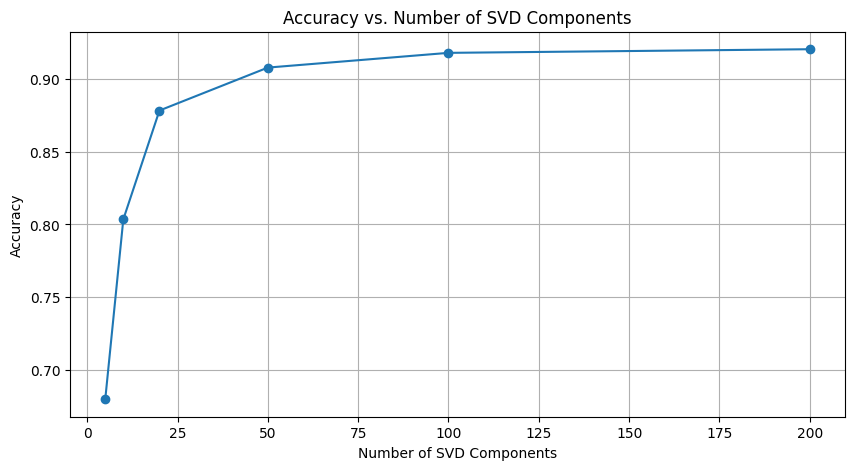

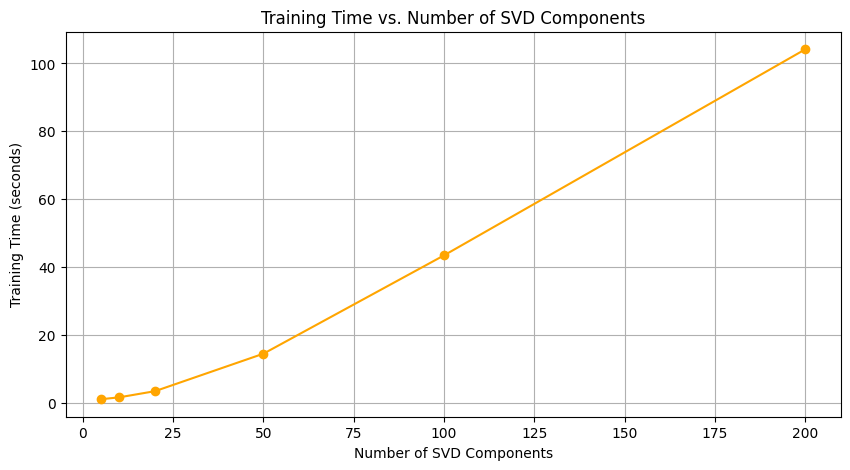

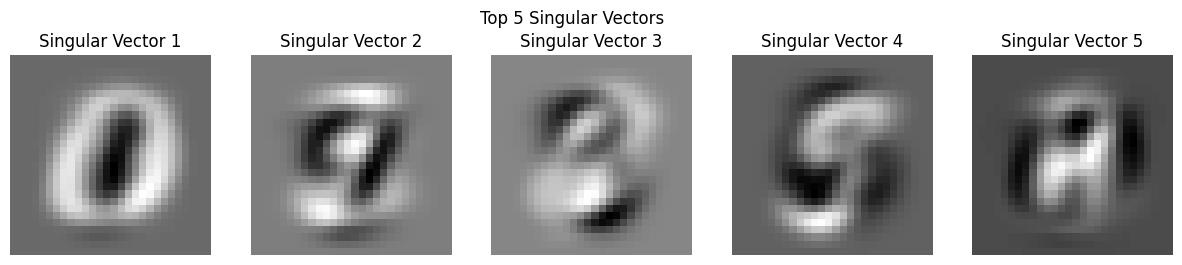

In [20]:
## Part 5: Visualize and Analyze the Results

import matplotlib.pyplot as plt

# Extract data for plotting
n_components_list = [result['n_components'] for result in results]
accuracy_list = [result['accuracy'] for result in results]
training_time_list = [result['training_time'] for result in results]

# Plot Accuracy vs. Number of SVD Components
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, accuracy_list, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot Training Time vs. Number of SVD Components
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, training_time_list, marker='o', color='orange')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.show()

# Function to extract singular vectors for visualization
def extract_singular_vectors(X_train, n_components):
    # Center the data by subtracting the mean
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean

    # Compute the covariance matrix
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / X_train_centered.shape[0]

    # Perform SVD using numpy
    U, S, Vt = np.linalg.svd(covariance_matrix)

    # Select the top n_components singular vectors
    U_reduced = U[:, :n_components]

    # Return the top singular vectors
    return U_reduced

# Extract the top 5 singular vectors
U_reduced = extract_singular_vectors(X_train, n_components=5)

# Visualize the Top 5 Singular Vectors
plt.figure(figsize=(15, 3))
for i in range(5):
    singular_vector = U_reduced[:, i]
    singular_image = singular_vector.reshape(28, 28)  # Reshape to 28x28 image
    plt.subplot(1, 5, i + 1)
    plt.imshow(singular_image, cmap='gray')
    plt.title(f'Singular Vector {i + 1}')
    plt.axis('off')
plt.suptitle('Top 5 Singular Vectors')
plt.show()

## Part 6: Analyze / Conclusion 

YOUR ANSWER: Applying SVD to the MNIST dataset revealed that increasing the number of components improves model accuracy but also significantly increases training time. An optimal range of around 50 to 100 components balances accuracy and efficiency, as further increases yield diminishing returns. Visualizing singular vectors demonstrated how SVD captures essential patterns, indicating that dimensionality reduction effectively retains critical information while reducing computational costs.